Chemical Reaction Engineering-1 , Assignment - 01 # Predicting the order of Chemical Reaction from experimentally obtained concentration- time data.

Student's Name: Karan Shukla
, Roll No. : 2022uch0052
 , Department of Chemical Engineering,  IIT Jammu

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

Experimental Data of Concentration VS Time

In [3]:
C = np.array([10, 8, 6, 5, 3, 2, 1])  # Concentrations (mol/L)
t = np.array([0, 20, 40, 60, 120, 180, 300])  # Time (s)

Zeroth Order

In [4]:
coeff_0th = np.polyfit(t, C, 1)
C_pred_0th = np.polyval(coeff_0th, t)
r2_0th = r2_score(C, C_pred_0th)

First-order reaction

In [5]:
ln_C = np.log(C)
coeff_1st = np.polyfit(t, ln_C, 1)
ln_C_pred = np.polyval(coeff_1st, t)
r2_1st = r2_score(ln_C, ln_C_pred)

Second-order reaction

In [6]:
inv_C = 1 / C
coeff_2nd = np.polyfit(t, inv_C, 1)
inv_C_pred = np.polyval(coeff_2nd, t)
r2_2nd = r2_score(inv_C, inv_C_pred)

Providing range for n

In [7]:
n_values = np.arange(0.1, 10, 0.1)  # n varies from 0.1 to 10
r2_n_values = []
for n in n_values:
    C_nth = C**(1-n)
    coeff_nth = np.polyfit(t, C_nth, 1)
    C_nth_pred = np.polyval(coeff_nth, t)
    r2_nth = r2_score(C_nth, C_nth_pred)
    r2_n_values.append(r2_nth)

optimal_n_index = np.argmax(r2_n_values)
optimal_n = n_values[optimal_n_index]
optimal_r2 = r2_n_values[optimal_n_index]



Plotting R^2 vs n

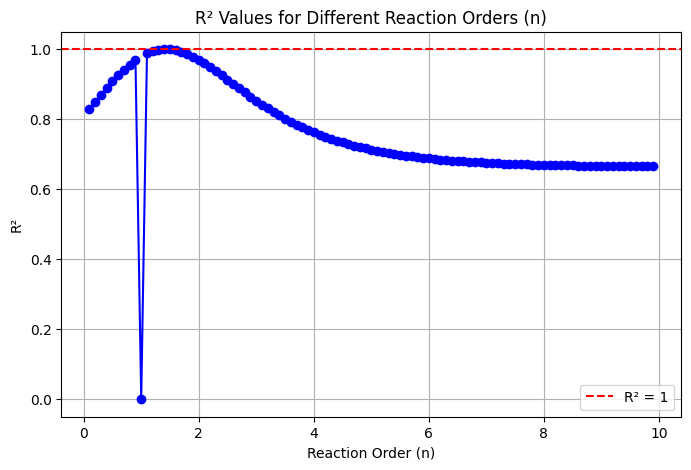

Optimal reaction order (n): 1.4000000000000001
R² value for optimal n: 0.9995063510534608


In [8]:
plt.figure(figsize=(8, 5))
plt.plot(n_values, r2_n_values, 'b-', marker='o')
plt.axhline(y=1, color='r', linestyle='--', label='R² = 1')
plt.title('R² Values for Different Reaction Orders (n)')
plt.xlabel('Reaction Order (n)')
plt.ylabel('R²')
plt.grid(True)
plt.legend()
plt.show()
print(f"Optimal reaction order (n): {optimal_n}")
print(f"R² value for optimal n: {optimal_r2}")


Plots for different values of n

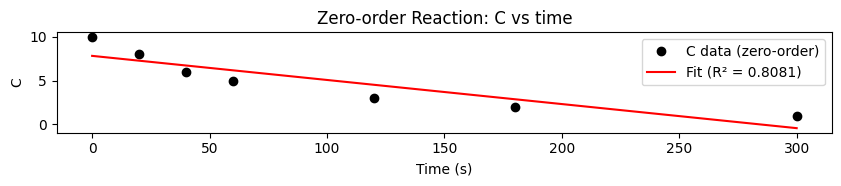

In [11]:
plt.figure(figsize=(10, 6))

# Zero-order plot
plt.subplot(4, 1, 1)
plt.plot(t, C, 'ko', label='C data (zero-order)')
plt.plot(t, C_pred_0th, 'r-', label=f'Fit (R² = {r2_0th:.4f})')
plt.title('Zero-order Reaction: C vs time')
plt.xlabel('Time (s)')
plt.ylabel('C')
plt.legend()

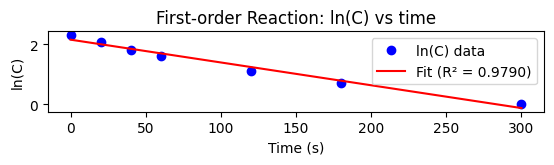

In [12]:
# First-order plot
plt.subplot(4, 1, 2)
plt.plot(t, ln_C, 'bo', label='ln(C) data')
plt.plot(t, ln_C_pred, 'r-', label=f'Fit (R² = {r2_1st:.4f})')
plt.title('First-order Reaction: ln(C) vs time')
plt.xlabel('Time (s)')
plt.ylabel('ln(C)')
plt.legend()

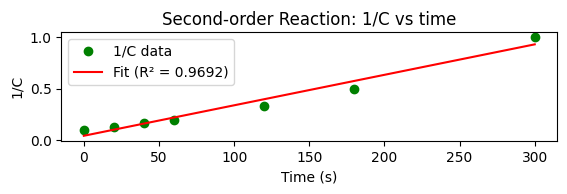

In [13]:
# Second-order plot
plt.subplot(3, 1, 2)
plt.plot(t, inv_C, 'go', label='1/C data')
plt.plot(t, inv_C_pred, 'r-', label=f'Fit (R² = {r2_2nd:.4f})')
plt.title('Second-order Reaction: 1/C vs time')
plt.xlabel('Time (s)')
plt.ylabel('1/C')
plt.legend()


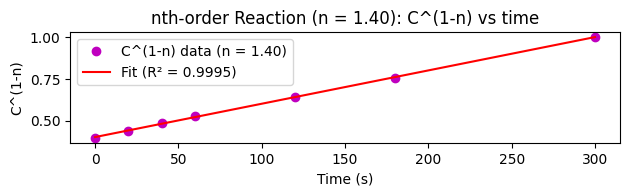

In [14]:

# nth-order plot
C_optimal_nth = C**(1-optimal_n)
coeff_optimal_nth = np.polyfit(t, C_optimal_nth, 1)
C_optimal_nth_pred = np.polyval(coeff_optimal_nth, t)

plt.subplot(3, 1, 3)
plt.plot(t, C_optimal_nth, 'mo', label=f'C^(1-n) data (n = {optimal_n:.2f})')
plt.plot(t, C_optimal_nth_pred, 'r-', label=f'Fit (R² = {optimal_r2:.4f})')
plt.title(f'nth-order Reaction (n = {optimal_n:.2f}): C^(1-n) vs time')
plt.xlabel('Time (s)')
plt.ylabel('C^(1-n)')
plt.legend()

plt.tight_layout()
plt.show()
